In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Для определения нуль-прострванства
import scipy.linalg

# Прикольная матрица из scipy
from scipy.linalg import toeplitz

plt.rcParams.update({'font.size': 10}) #Параметры текста 
import matplotlib_inline.backend_inline

# Столбцовое пространство

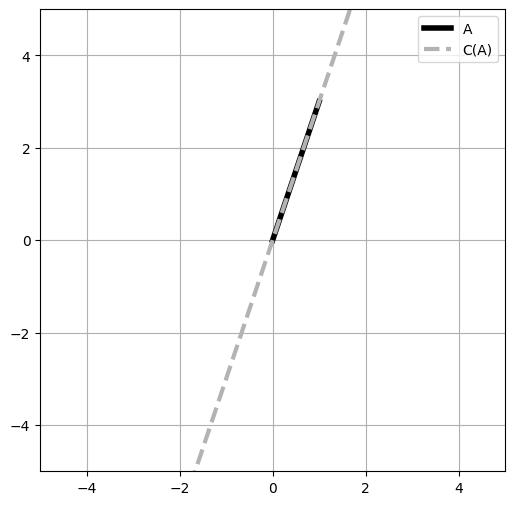

In [11]:
# Матрица (Просто вектор-стобец)
A = np.array([ [1], [3] ])

# Столбцовое пространство состоит из бесконечного числа векторов (точек), однако для его отображения мы не можем использовать бесконечность,
# поэтому используем конечные числа
xlim = [-5, 5]
colspace_p1 = xlim[0] * A
colspace_p2 = xlim[1] * A

# Изобразим вектор и его столбцовое пространство
plt.figure(figsize=(6, 6))

plt.plot([0, A[0, 0]], [0, A[1, 0]], "k", linewidth=4, label="A")
plt.plot([colspace_p1[0,0], colspace_p2[0, 0]], [colspace_p1[1, 0], colspace_p2[1, 0]], "--", color=[.7, .7, .7], linewidth=3,
        label='C(A)')

plt.grid()
plt.xlim(xlim)
plt.ylim(xlim)
plt.legend()
plt.show()

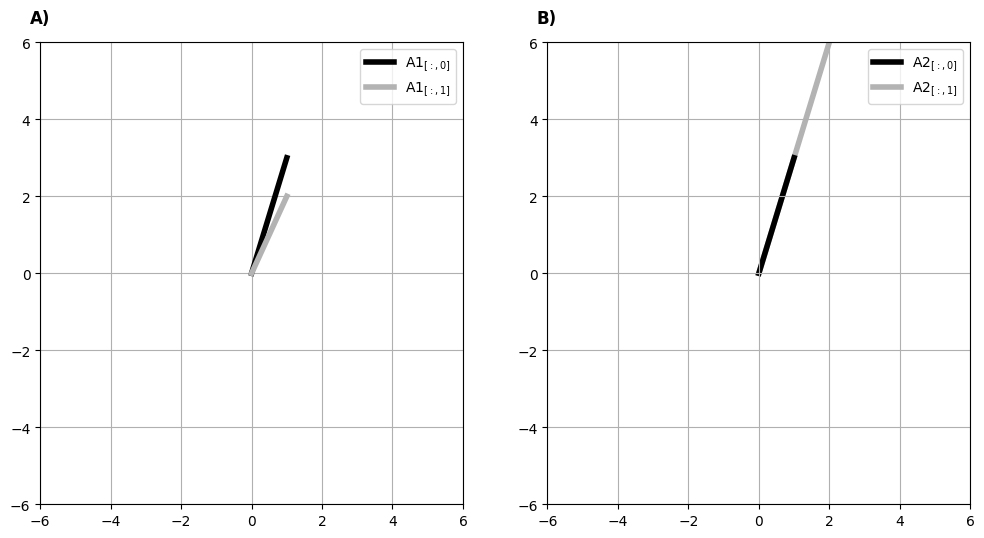

In [12]:
# Покажем на матрицах
A1 = np.array([ [1, 1], [3, 2] ])
A2 = np.array([ [1, 2], [3, 6] ])

# Другие параметры отображения
xlim = [-6, 6]
color = [[0, 0, 0], [.7, .7, .7]]

# Изобразим столбцовое пространство этих двух матриц (а точнее векторы, образающиеся из столбцов матриц)
_, axs = plt.subplots(1, 2, figsize=(12, 6))

# реализуем с помощью цикла
for i in range(2):
    axs[0].plot([0, A1[0, i]], [0, A1[1, i]], color=color[i], linewidth=4)
    axs[1].plot([0, A2[0, i]], [0, A2[1, i]], color=color[i], linewidth=4, zorder=-i)

    # Добавим параметры графиков
    axs[i].set_xlim(xlim)
    axs[i].set_ylim(xlim)
    axs[i].grid()
    axs[i].text(xlim[0]-.3, xlim[1]+.5, f'{"AB"[i]})', fontweight='bold', fontsize=12)

# Добавим легенду
for i in [0, 1]: axs[i].legend([f'A{i+1}$_{{[:,0]}}$', f'A{i+1}$_{{[:,1]}}$'])

plt.show()

# Теперь для R3

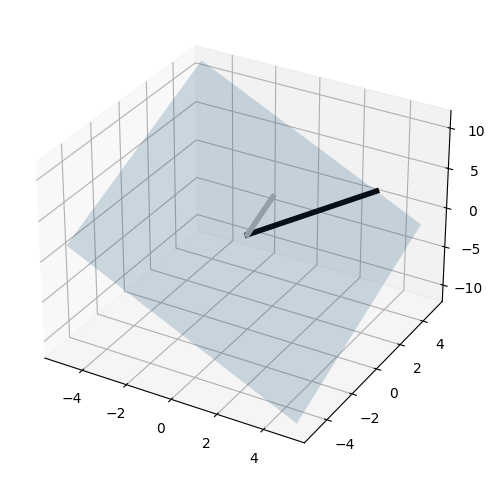

In [13]:
# матрица с двумя столбцами
A = np.array([ [3, 0], 
               [5, 2], 
               [1, 2] ])

# Создадим 3D заготовку для графика
ax = plt.figure(figsize=(6, 6)).add_subplot(111, projection="3d")

# Изобразим стлбцовое пространство
xx, yy = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5, 10))
cp = np.cross(A[:,0], A[:,1])
z1 = (-cp[0] * xx - cp[1] * yy) / cp[2]
ax.plot_surface(xx, yy, z1, alpha=.2)

# Добавим вектора
ax.plot([0, A[0, 0]], [0, A[1, 0]], [0, A[2, 0]], 'k', linewidth=4)
ax.plot([0, A[0, 1]], [0, A[1, 1]], [0, A[2, 1]], color=[.7, .7, .7], linewidth=4)

plt.show()

# Нуль-пространства

In [14]:
# Две матрицы
A = np.array([ [1, -1], [-2, 2] ])
B = np.array([ [1, -1], [-2, 3] ])

# Нуль пространство (в виде вектора, который нужно шкалировать)
print(scipy.linalg.null_space(A), end='\n\n')

print(scipy.linalg.null_space(B))

[[0.70710678]
 [0.70710678]]

[]


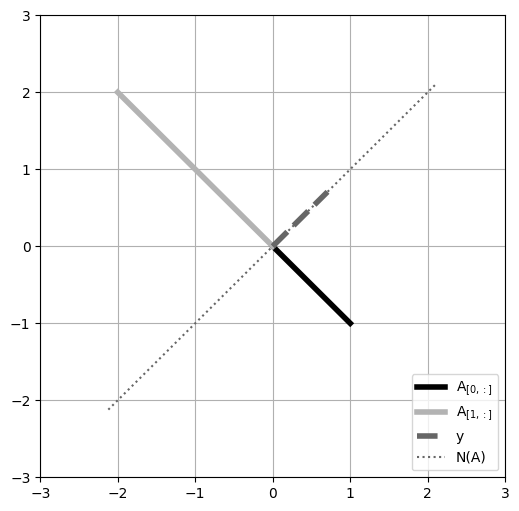

In [30]:
# Испотльзуем матрицу A для визуализации
nullvect = scipy.linalg.null_space(A)

# Параметры для отрисовки
xlim = [-3, 3]
color = [[0, 0, 0], [.7, .7, .7]]

# Нарисуем нуль-пространсвто и векторы-столбцы
plt.figure(figsize=(6, 6))

# Наримуем стобцы
for i in range(2):
    plt.plot([0, A[i, 0]], [0, A[i, 1]], linewidth=4, color=color[i], label=f'A$_{{[{i},:]}}$')

# Изобразим вектор из нуль-пространства
plt.plot([0, nullvect[0, 0]], [0, nullvect[1, 0]], '--', color=[.4, .4, .4], linewidth=4, label="y")

# Изобразим нуль-пространство
plt.plot([xlim[0]*nullvect[0, 0], xlim[1]*nullvect[0, 0]], [xlim[0]*nullvect[1,0], xlim[1]*nullvect[1,0]], ':', color=[.4, .4, .4], label="N(A)")

plt.grid()
plt.xlim(xlim)
plt.ylim(xlim)
plt.legend()
plt.show()

# Упражнения по программированию

### Упражнение 1. Взаимосвязь нормы Фробениуса со значениями в матрице

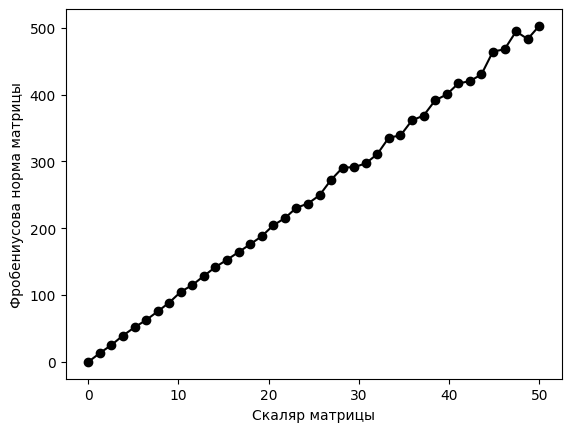

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
# Значения скаляров для масштабирования матриц
scalar = np.linspace(0, 50, 40)
# Количество итераций
iter = 10
# Размер квадратной матрицы
N = 10

# Основа для матрицы 40х10
matrixNorms = np.zeros((len(scalar), iter))

# С помощью циклов зададим эксперимент
for si in range(len(scalar)):
    for expi in range(iter):
        # Создадим рандомную матрицу, указанного размера, масштабированную скаляром
        R = np.random.randn(N, N) * scalar[si]

        # Запишем её норму Фробениуса в матрицу эксперимента
        matrixNorms[si, expi] = np.linalg.norm(R)

# Изобразим результаты, усреднив по каждому эксперименту
plt.plot(scalar, np.mean(matrixNorms, axis=1), "ko-")
plt.xlabel("Скаляр матрицы")
plt.ylabel("Фробениусова норма матрицы")
plt.show()

# Выведем норму для матрицы нулей
print(matrixNorms[0,:])

### Упражнение 2. Оптимизация методом уменьшения нормы Фронебиуса между двумя матрицами

In [16]:
# Сделаем функцию для вычисления вычисления фробениусово расстояния между двумя матрицами
def EuclidianDistance(M1, M2):
    if M1.shape != M2.shape:
        return print("Матрицы не согласуются по размерам")
    D = M1 - M2
    return np.sqrt(np.sum(D**2))

In [48]:
# Размер матриц и сами матрицы
N = 7
A = np.random.randn(N, N)
B = np.random.randn(N, N)

# Зададим скаляр равный единице, который будет отвечать за шкалирование матриц
s = 1
count = 0 # Счетчик, показывающий сколько раз мы прошлись по циклу
# С помощью цикла найдем скаляр, который сводит норму Фробениуса между ними к единице
while EuclidianDistance(s*A, s*B) > 1:
    s *= 0.9
    count += 1

# Покажем результаты
print("Количество итераций:", count-1) # -1, так как нас интересет последнее значение s, при котором расстояние между матрицами больше 1
print("Значение скаляра:", "{:.3f}".format(s / 0.9)) # аналогично предыдущему пункту, делим на 0.9
print("Конечное Евклидово расстояние между матрицами:", "{:.3f}".format(EuclidianDistance(s*A/0.9, s*B/0.9)))

Количество итераций: 22
Значение скаляра: 0.098
Конечное Евклидово расстояние между матрицами: 1.001


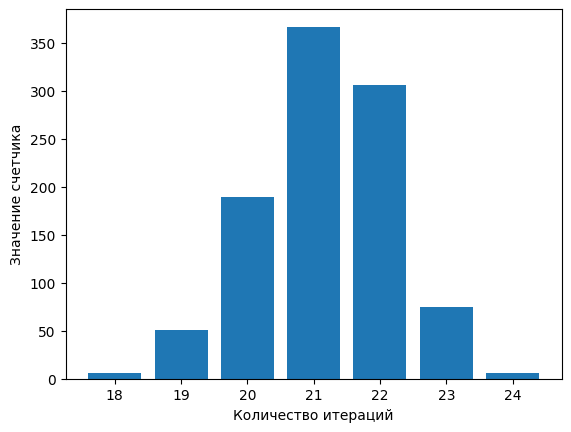

In [76]:
# Дополнительный код, не являющийся упражнением, а просто вызуализация
# Повторим оптимизацию 1000 раз, чтобы посмотреть сколько в среднем нужно итераций для точного ответа
nIters = np.zeros(1000)

for i in range(1000):
    A = np.random.randn(N, N)
    B = np.random.randn(N, N)

    numIters, s = 0, 1
    while EuclidianDistance(s*A, s*B) > 1:
        s *= 0.9
        numIters += 1
    nIters[i] = numIters - 1


plt.bar(np.unique(nIters), np.unique(nIters, return_counts=True)[1])
plt.xlabel("Количество итераций")
plt.ylabel("Значение счетчика")
plt.show()

### Упражнение 3. Показать, что метод следа матрицы и евклидова формула дают одну и ту же норму (Фробениуса)

In [104]:
# Создадим матрицу
N = 50
M = np.random.randn(N, N)

# Норма через след
norm1 = np.sqrt(np.sum(np.diag(M @ M.T)))

# Норма как евклидово расстояние
norm2 = np.sqrt(np.sum(M**2))

# Проверить равенство норм
print(norm1-norm2)

7.105427357601002e-15


### Упражнение 4. Влияние сдвига матрицы на её норму

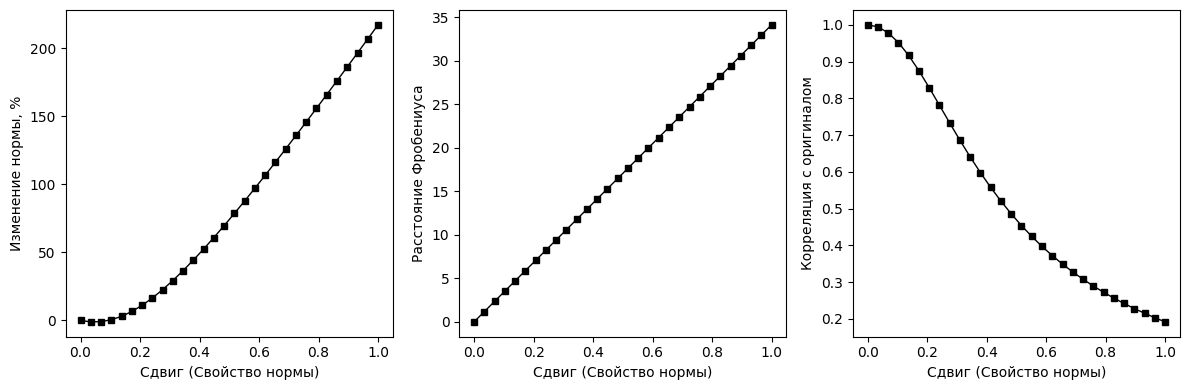

In [133]:
# размер матрицы
N = 10

# Зададим саму матрицу и вычислим её норму
A = np.random.randn(N, N)
normA = np.linalg.norm(A)

# Зададим 30 точек между 0 и 1
shifting = np.linspace(0, 1, 30)

# Зададим матрицу, в которую будем записывать изменение нормы в %, корреляцию с оригиналом и само фробеиусово расстояние
shiftingResults = np.zeros((len(shifting), 3))
resultsName = ["Изменение нормы, %" , "Расстояние Фробениуса", "Корреляция с оригиналом"]

for si in range(len(shifting)):
    # Получим сдвинутую матрицу на долю нормы s
    As = A - shifting[si] * normA * np.eye(N)
    # Вычислим процентное изменение нормы и запишем в матрицу с результатами
    normAs = np.linalg.norm(As)
    shiftingResults[si, 0] = (normAs - normA) / normA * 100
    # Вычислим расстояния Фробениуса между начальной матрицей и сдвинутой, запишем в матрицу с результатами
    shiftingResults[si, 1] = EuclidianDistance(A, As)
    # Вычислим коэффициент корреляции между начальной и сдвинутой матрицей с помощью np.flatten()
    shiftingResults[si, 2] = np.corrcoef(A.flatten(), As.flatten())[0, 1]

# Отрисуем результат
_, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    axs[i].plot(shifting, shiftingResults[:, i], 'ks-', markersize=4, linewidth=1)
    axs[i].set_xlabel("Сдвиг (Свойство нормы)")
    axs[i].set_ylabel(resultsName[i])

plt.tight_layout()

### Упражнение 5. Создание случайный матриц с произвольным рангом

In [139]:
# Размер матрицы и ранг
N, M, r = 5, 8, 3

# Создадим случайную матрицу размером 5х8 и рангом 3
A = np.random.randn(N, r) @ np.random.randn(r, M)

# Проверим полученный результат
print(A.shape)
print(np.linalg.matrix_rank(A))

(5, 8)
3


### Упражнение 6. Правило сложения ранга матриц $r(A+B)\leq r(A)+r(B)$ и правило умножения матриц $r(AB)\leq min\{r(A),r(B)\}$

In [153]:
# Здесь используются только одноранговые матрицы
# Сумма матриц имеет ранк 0
A = np.diag([1, 0, 0, 0])
B = np.diag([-1, 0, 0, 0])
C = A + B
# Выведем их ранги
print((np.linalg.matrix_rank(A), np.linalg.matrix_rank(B), np.linalg.matrix_rank(C)))

(1, 1, 0)


In [154]:
# Сумма матриц имеет ранк 1
A = np.diag([1, 0, 0, 0])
B = np.zeros(A.shape)
B[0,1] = 10
C = A + B
# Выведем их ранги
print((np.linalg.matrix_rank(A), np.linalg.matrix_rank(B), np.linalg.matrix_rank(C)))

(1, 1, 1)


In [155]:
# Сумма матриц имеет ранк 2
A = np.diag([1, 0, 0, 0])
B = np.diag([0, 1, 0, 0])
B[0,1] = 10
C = A + B
# Выведем их ранги
print((np.linalg.matrix_rank(A), np.linalg.matrix_rank(B), np.linalg.matrix_rank(C)))

(1, 1, 2)


In [84]:
# Сумма случайных матриц всегда имеет максимально возможный ранг!
A = np.random.randn(5, 1) @ np.random.randn(1, 5)
B = np.random.randn(5, 1) @ np.random.randn(1, 5)
C = A + B
print((np.linalg.matrix_rank(A), np.linalg.matrix_rank(B), np.linalg.matrix_rank(C)))

(1, 1, 2)


In [163]:
# Сделаем все аналогично для умножения
# Здесь используются только одноранговые матрицы
# Произведение матриц имеет ранк 0
A = np.diag([1, 0, 0, 0])
B = np.diag([0, 0, 1, 0])
C = A @ B
# Выведем их ранги
print((np.linalg.matrix_rank(A), np.linalg.matrix_rank(B), np.linalg.matrix_rank(C)))

(1, 1, 0)


In [5]:
# Произведение матриц имеет ранк 1
A = np.diag([1, 0, 0, 0])
B = np.zeros(A.shape)
B[0,1] = 10
C = A @ B
# Выведем их ранги
print((np.linalg.matrix_rank(A), np.linalg.matrix_rank(B), np.linalg.matrix_rank(C)))

(1, 1, 1)


In [168]:
# Произведение случайных матриц всегда имеет максимально возможный ранг!
A = np.random.randn(5, 3) @ np.random.randn(3, 5)
B = np.random.randn(5, 4) @ np.random.randn(4, 5)
C = A @ B
print((np.linalg.matrix_rank(A), np.linalg.matrix_rank(B), np.linalg.matrix_rank(C)))

(3, 4, 3)


### Упражнение 7. Визуализация ранга для суммы и произведения матриц.

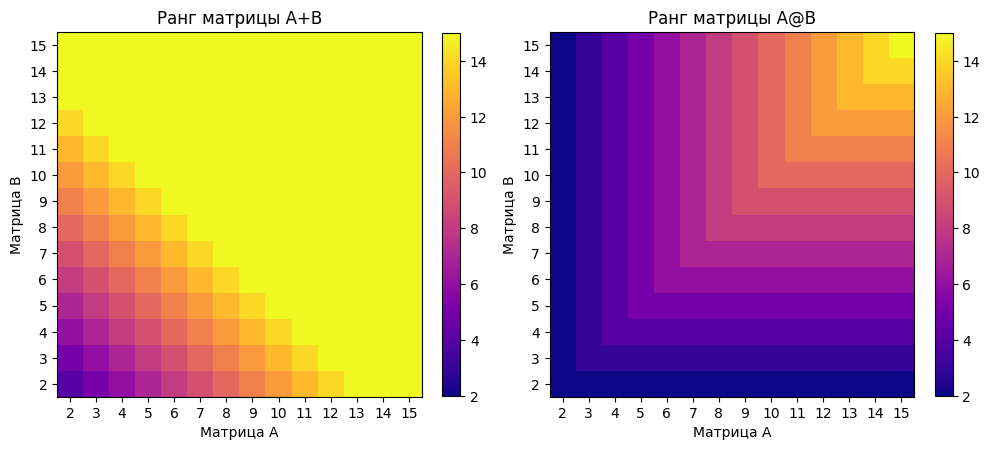

In [3]:
# функция для создания матриц MxM и ранга r
def makeAmatrix(M, r):
    return np.random.randn(M, r) @ np.random.randn(r, M)

# Параметры для размера матриц и рангов
MatSize = 20
rs = range(2, 16)

# Матрица для хранения рангов суммы и произведения матриц
Ranks = np.zeros((len(rs), len(rs), 2))

for i in range(len(rs)):
    for j in range(len(rs)):
        S = makeAmatrix(MatSize, rs[i]) + makeAmatrix(MatSize, rs[j])
        M = makeAmatrix(MatSize, rs[i]) @ makeAmatrix(MatSize, rs[j])
        
        Ranks[i, j, 0] = np.linalg.matrix_rank(S)
        Ranks[i, j, 1] = np.linalg.matrix_rank(M)

# Визуализация
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
s = "+@" # символы для заголовка

for i in range(2):
    h = axs[i].imshow(Ranks[:, :, i], cmap="plasma", vmin=min(rs), vmax=max(rs),
                     origin="lower", extent=(rs[0]-.5, rs[-1]+.5, rs[0]-.5, rs[-1]+.5), aspect="equal")
    # Добавим бар и другие тонкости
    plt.colorbar(h, ax=axs[i], fraction=0.045, )
    axs[i].set_xticks(np.arange(2, 16, 1))
    axs[i].set_yticks(np.arange(2, 16, 1))
    axs[i].set_xticklabels(np.arange(2, 16, 1))
    axs[i].set_yticklabels(np.arange(2, 16, 1))
    axs[i].set_ylabel("Матрица B")
    axs[i].set_xlabel("Матрица A")
    axs[i].set_title(f'Ранг матрицы A{s[i]}B')

plt.tight_layout()
plt.show()

### Упражнение 8. Показать, что ранги матриц $A, A^T, A^TA, AA^T$ одинаковы.

In [13]:
# зададим параметры матрицы
N = 7
M = 24
r = 5
# Вычислим 4 матрицы
A = np.random.randn(N, r) @ np.random.randn(r, M)
At = A.T
AtA = At @ A
AAt = A @ A.T
# Выведем их ранги
print(np.linalg.matrix_rank(A),
     np.linalg.matrix_rank(At),
     np.linalg.matrix_rank(AtA),
     np.linalg.matrix_rank(AAt),)

5 5 5 5


### Упражнение 9. Проверка принадлежности вектора столбцовому пространству матрицы $\textbf{v}\in C(\textbf{A})$.

In [75]:
# Напишем функцию
def is_v_in_CA(A, v):
    # Проверим размерности
    if v.shape[0] != A.shape[0]:
        return print("Вектор не совпадает с размером столбцового пространства.")
    # Вычислим ранги
    rangA = np.linalg.matrix_rank(A)
    rangAv = np.linalg.matrix_rank(np.hstack((A, v)))
    # Функция возращает True, если v находится в C(A)
    return rangA == rangAv

# Посмотрим работу функции на примере
A = np.random.randn(4, 3)
v = np.random.randn(4, 1)

print(is_v_in_CA(A, v))

False


### Упражнение 10. Определитель рангово-пониженной матрицы.

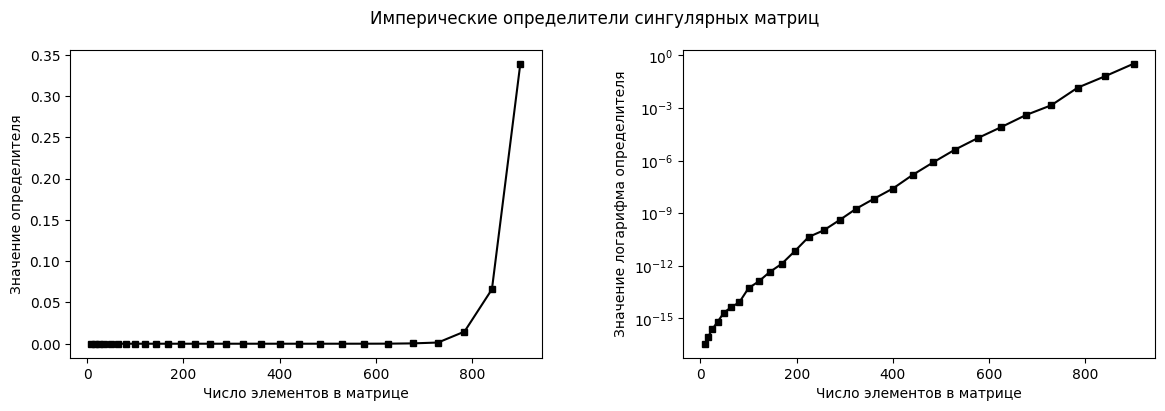

In [83]:
# Зададим вектор с размером матриц
N_Matrix = np.arange(3, 31)
N_exp = 100

# Создадим основу для хранения значений определителей
Dets = np.zeros((len(N_Matrix), N_exp))

# Циклом зададим эксперимент
for mi in range(len(N_Matrix)):
    for expi in range(N_exp):
        M = np.random.randn(N_Matrix[mi], N_Matrix[mi])
        M[:, 1] = M[:, 0]
        Dets[mi, expi] = np.abs(np.linalg.det(M))

# Визализируем полученные данные
linlog = ["linear", "log"]
Ylabel = ["Значение определителя", 'Значение логарифма определителя']
fig, axs = plt.subplots(1, 2, figsize=(14, 4))
for i in range(2):
    axs[i].plot(N_Matrix**2, np.mean(Dets, axis=1), "ks-", markersize=4)
    axs[i].set_yscale(linlog[i])
    axs[i].set_xlabel("Число элементов в матрице")
    axs[i].set_ylabel(Ylabel[i])
    plt.subplots_adjust(wspace=0.3) # Увеличение расстояния между подграфиками

#plt.tight_layout()
fig.suptitle("Имперические определители сингулярных матриц")
plt.show()